# Word and Document Embeddings

#### Before we begin, let's dowload the pre-trained Word2Vec model for later: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

#### The data can be downloaded here: https://www.kaggle.com/utathya/imdb-review-dataset

#### And let's get all of the imports out of the way.

In [49]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib notebook

## Simply put, word embeddings are words converted into numbers. 
## And there are several different ways to convert a word to a vector. You can use counting methods or probabilistic methods.

### Let's start with a counting method.

## Bag of Words
Dump all of the words from your dataset into bag! We don't care about order or structure anymore.
Can use binary, counts, frequencies.
Very frequent words dominate our vectors and they may not be very informative. Let's use TF-IDF.   
Pros:
1. Easy to understand!
2. Easy to implement!   

Cons:
1. Sparsity: There are a lot of words we only see once and they are still in our vocabulary. The size becomes computationally unwieldy.
2. Meaning: We are ignoring the context of the words and thus are losing a lot of the meaning. Consider synonyms and negation.

With bag of words, we represent an entire document (sentence, paragraph, article, etc.) as one vector. We can either do a binary (if it appears at least once, the word is marked with a 1) or a frequency count (the word is marked with the exact number of times that it appears).

Either way, we will start with some preprocessing.

### Movie Reviews

In [3]:
review1 = "The only reason I remember this movie is because it was (and still is) the biggest waste of time and money ever spent. I want my money back."
review2 = "You know, this movie isn't that great, but, I mean, c'mon, it's a movie about angels helping a baseball team."



#### Remove punctuation

In [50]:
def remove_punctuation(text):
    # replace all punctuation with nothing (map to None)
    translator = str.maketrans('', '', string.punctuation)
    # return translated and lowered text
    return text.translate(translator).lower()

review1_clean = remove_punctuation(review1)
review2_clean = remove_punctuation(review2)
print(review1_clean)
print(review2_clean)

the only reason i remember this movie is because it was and still is the biggest waste of time and money ever spent i want my money back
you know this movie isnt that great but i mean cmon its a movie about angels helping a baseball team


#### Tokenize the sentences into words

In [51]:
review1_tokens = word_tokenize(review1_clean)
review2_tokens = word_tokenize(review2_clean)
print(review1_tokens)
print(review2_tokens)

['the', 'only', 'reason', 'i', 'remember', 'this', 'movie', 'is', 'because', 'it', 'was', 'and', 'still', 'is', 'the', 'biggest', 'waste', 'of', 'time', 'and', 'money', 'ever', 'spent', 'i', 'want', 'my', 'money', 'back']
['you', 'know', 'this', 'movie', 'isnt', 'that', 'great', 'but', 'i', 'mean', 'cmon', 'its', 'a', 'movie', 'about', 'angels', 'helping', 'a', 'baseball', 'team']


#### Remove stop words

In [53]:
stopwords = set(stopwords.words('english'))
stopwords.add('isnt')
print(stopwords)

{'such', 'yours', 'so', 'don', 'by', 'most', 'do', 'if', 'with', "shouldn't", 'yourselves', "doesn't", 'out', 'hers', 'be', 'in', 'during', 'before', 'each', 'some', 'isn', 'they', 'now', 'yourself', 'into', 'once', 'here', 'just', 'your', 'is', 'doesn', 'the', 'for', "isn't", "couldn't", "hadn't", 'has', 'very', 'mustn', 'my', 'me', 'between', 'you', "mightn't", 'an', 'can', 'this', 'his', 'own', 'doing', 'we', 'at', 'ma', 'where', 'himself', 'shan', 'won', 'y', 'a', 'does', 'to', 'd', 'ain', 'its', 'been', 'than', 'down', 'then', 'against', "weren't", "she's", 'their', 'off', 'all', 'through', 'ours', 'more', 'because', 'those', 'itself', 'i', 'o', 's', 'both', 'after', 'our', 'haven', "haven't", 'or', 'didn', 'shouldn', 'll', 're', 'as', 'are', "mustn't", "won't", 'hadn', 'how', "you'd", 'above', 'should', 'about', 'over', 'am', 'other', 'until', 'same', 'having', "should've", "shan't", 'ourselves', 'not', 'only', 'wouldn', 'of', 'weren', 'couldn', 'these', 'aren', 'who', 'and', "yo

In [54]:
review1_tokens_clean = [word for word in review1_tokens if word not in stopwords]
review2_tokens_clean = [word for word in review2_tokens if word not in stopwords]
print(review1_tokens_clean)
print(review2_tokens_clean)

['reason', 'remember', 'movie', 'still', 'biggest', 'waste', 'time', 'money', 'ever', 'spent', 'want', 'money', 'back']
['know', 'movie', 'great', 'mean', 'cmon', 'movie', 'angels', 'helping', 'baseball', 'team']


#### Stemming vs. Lemmatization

In [55]:
# Stemming
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    # stem each word in the text
    text = [stemmer.stem(word) for word in text]
    return text

# Lemmatization 
# create an object of lemmatization function
lem = WordNetLemmatizer()

def lemmatizing(text):
    # lemmatize each word in the text
    text = [lem.lemmatize(word) for word in text]
    return text

In [57]:
stemmer.stem('flying')

'fli'

In [60]:
# Example of stemming vs lemmatization
print("Stemming takes the word 'better' and makes it:", stemmer.stem('better'))
print("Lemmatization takes the word 'better' and makes it:", lem.lemmatize('better', 'a'))

Stemming takes the word 'better' and makes it: better
Lemmatization takes the word 'better' and makes it: good


In [61]:
review1_stem = stemming(review1_tokens_clean)
review2_stem = stemming(review2_tokens_clean)
print(review1_stem)
print(review2_stem)

['reason', 'rememb', 'movi', 'still', 'biggest', 'wast', 'time', 'money', 'ever', 'spent', 'want', 'money', 'back']
['know', 'movi', 'great', 'mean', 'cmon', 'movi', 'angel', 'help', 'basebal', 'team']


In [62]:
review1_lem = lemmatizing(review1_tokens_clean)
review2_lem = lemmatizing(review2_tokens_clean)
print(review1_lem)
print(review2_lem)

['reason', 'remember', 'movie', 'still', 'biggest', 'waste', 'time', 'money', 'ever', 'spent', 'want', 'money', 'back']
['know', 'movie', 'great', 'mean', 'cmon', 'movie', 'angel', 'helping', 'baseball', 'team']


#### Create the vocabulary set

In [63]:
all_tokens = review1_stem + review2_stem
vocab = list(set(all_tokens))
print(vocab)

['mean', 'ever', 'spent', 'still', 'wast', 'back', 'movi', 'help', 'time', 'biggest', 'team', 'money', 'know', 'want', 'angel', 'great', 'basebal', 'rememb', 'reason', 'cmon']


#### Count vectors

In [64]:
def create_vectors(docs, vocab, binary=False):
    data = []
    
    for index, doc in enumerate(docs):
        bag_vector = np.zeros(len(vocab))
        for token in doc:
            for index, vocab_word in enumerate(vocab):
                if token == vocab_word:
                    if binary:
                        bag_vector[index] = 1
                    else:
                        bag_vector[index] += 1
        data.append(list(bag_vector))
    
    return pd.DataFrame(columns=vocab, data=data)

docs = [review1_stem, review2_stem]

df = create_vectors(docs, vocab)

In [65]:
df

,mean,ever,spent,still,wast,back,movi,help,time,biggest,team,money,know,want,angel,great,basebal,rememb,reason,cmon
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


#### Binary Vectors

In [73]:
docs = [review1_stem, review2_stem]

df = create_vectors(docs, vocab, binary=True)

In [74]:
df

,team,reason,rememb,want,money,mean,cmon,spent,wast,biggest,basebal,still,back,time,angel,ever,help,great,know,movi
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


### All together now

In [66]:
from nltk.corpus import stopwords
translator = str.maketrans('', '', string.punctuation)
stopwords = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def clean_text(text, translator, stopwords, stemmer):
    # translate and lowered text
    text_clean = text.translate(translator).lower()
    
    #tokenize
    tokens = word_tokenize(text)
    
    # remove stop words
    tokens_clean = [word for word in tokens if word not in stopwords]
    
    # stem each word in the text
    stemmed = [stemmer.stem(word) for word in tokens_clean]
    
    return stemmed

def create_vocab(docs):
    all_tokens = []
    for doc in docs:
        all_tokens += doc
    vocab = list(set(all_tokens))
    return vocab

In [67]:
df_reviews = pd.read_csv("imdb_master.csv", encoding='latin-1', index_col=0)
df_reviews.head()
df_reviews = df_reviews[:100]
df_reviews.head()

,type,review,label,file
0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [68]:
df_reviews['processed_reviews'] = df_reviews.review.apply(lambda x: clean_text(x, translator, stopwords, stemmer))

In [69]:
large_vocab = create_vocab(df_reviews['processed_reviews'].tolist())
df_vectors = create_vectors(df_reviews['processed_reviews'].tolist(), large_vocab)

In [70]:
df_vectors.head()

,rang,period,donald,kong,ok,off-screen,mountain,tactic,unimagin,marriag,...,kkk,boost,market,break,novel,imagin,anoth,extend,lead,flu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Notice how sparse it is! This leads us to using a probabilistic method, but there are also things we can do here.
Like, we could decide to limit words in our vocabulary to words that appear at least some number of times.
Or we could use TF-IDF to remove words that appear too frequently and are not of use.

#### TF-IDF

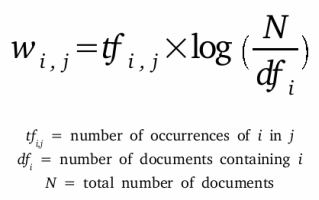

In [72]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', use_idf=True)
tfidf_vectors = vectorizer.fit_transform(df_reviews['review'])
tfidf_vectors.todense()[0]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.15892443, 0.        , 0.        , 0.        , 0.15892443,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.12419043, 0.        , 0.10014215,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

## Moving on to probabilistic methods.

### Word2Vec (embed words)

In [73]:
#loading the downloaded model
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [74]:
# getting word vectors of a word
dog = model['dog']

#performing king queen magic
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

#picking odd one out
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

#printing similarity index
print(model.similarity('woman', 'man'))

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431607246399), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454)]
cereal
0.7664012230995352


In [85]:
print(model.most_similar(positive=['hero', 'evil']))

[('villain', 0.6951230764389038), ('heroes', 0.6603301763534546), ('evil_personified', 0.6032072305679321), ('villains', 0.6016811728477478), ('villainous', 0.5982264280319214), ('arch_villain', 0.5932464599609375), ('heros', 0.5841301679611206), ('archvillain', 0.5822436809539795), ('villian', 0.5768199563026428), ('baddie', 0.5739427804946899)]


<IPython.core.display.Javascript object>


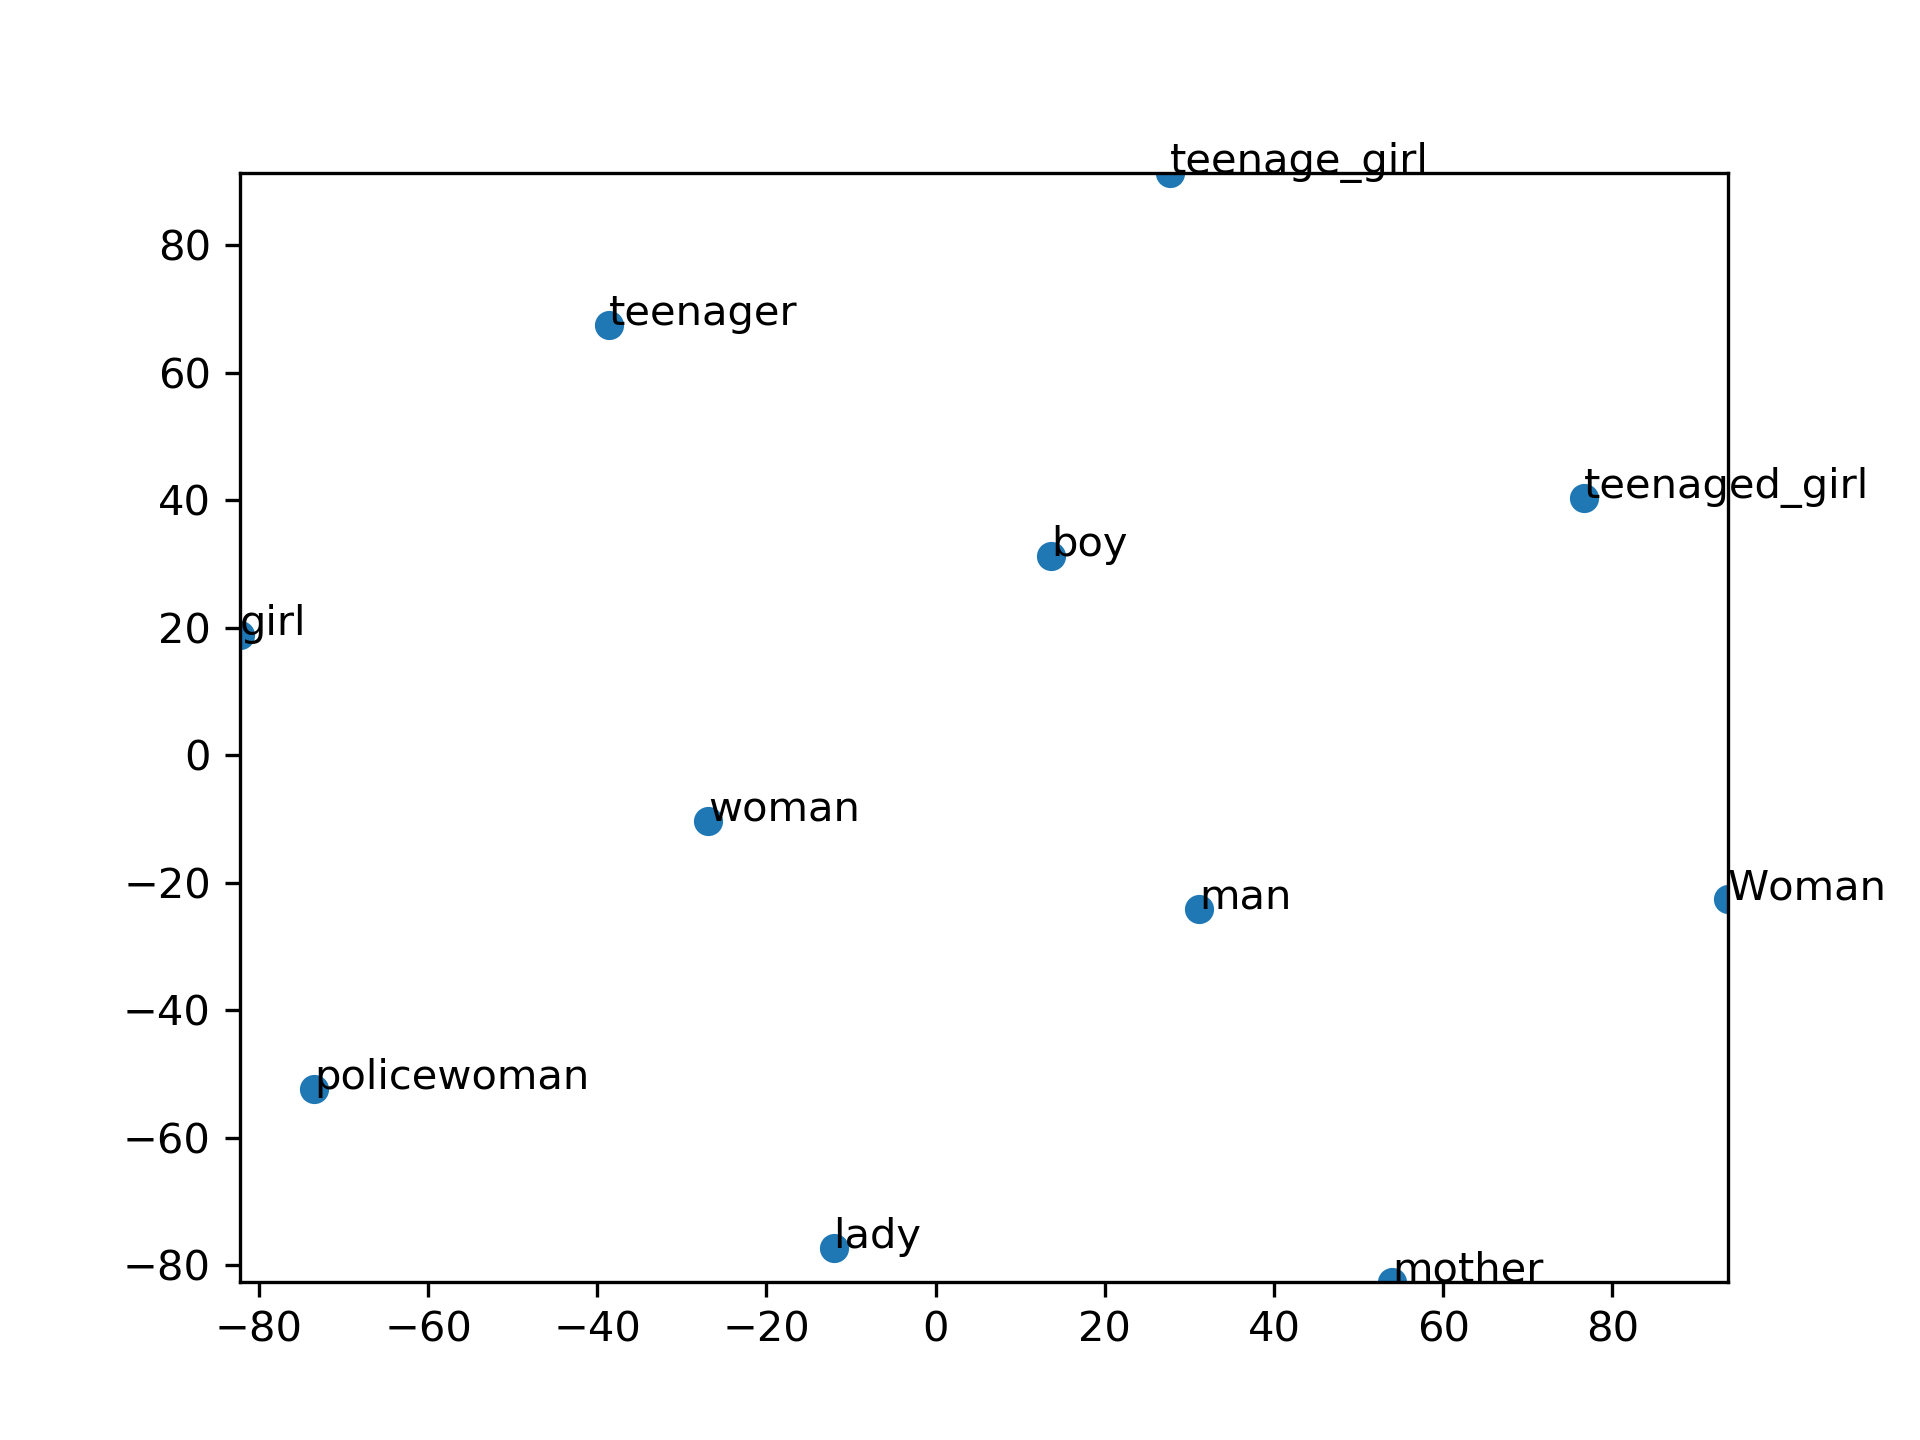

In [81]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
display_closestwords_tsnescatterplot(model, 'woman')